# CAR PRICE PREDICTION

In this notebook, tree-based algorithms will be applied and predictions will be made with the selected model.

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)
pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
df = pd.read_csv("scoutcar_notdummy.csv")
df.head()

,Make_Model,Body_Type,Price,Vat,Age,Type,Km,Previous_Owners,Inspection_New,Paint_Type,Nr.OfDoors,Nr.OfSeats,Upholstery_Type,Fuel,Drive_Chain,Gearing_Type,Gears,Hp_kW,Displacement_cc,Weight_kg,Cons_Comb (l/100 km),CO2_Emission (g/km CO2),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security
0,Audi A1,Sedans,15770,VAT deductible,3.000,Used,56013.000,2.000,1,Metallic,5.000,5.000,Cloth,Diesel,front,Automatic,7.000,66.000,1422.000,1220.000,3.800,99.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D..."
1,Audi A1,Sedans,14500,Price negotiable,2.000,Used,80000.000,1.000,0,Metallic,3.000,4.000,Cloth,Benzine,front,Automatic,7.000,141.000,1798.000,1255.000,5.600,129.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r..."
2,Audi A1,Sedans,14640,VAT deductible,3.000,Used,83450.000,1.000,0,Metallic,4.000,4.000,Cloth,Diesel,front,Automatic,7.000,85.000,1598.000,1250.000,3.800,99.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D..."
3,Audi A1,Sedans,14500,VAT deductible,3.000,Used,73000.000,1.000,0,Metallic,3.000,4.000,Cloth,Diesel,front,Automatic,6.000,66.000,1422.000,1195.000,3.800,99.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote..."
4,Audi A1,Sedans,16790,VAT deductible,3.000,Used,16200.000,1.000,1,Metallic,5.000,5.000,Cloth,Diesel,front,Automatic,7.000,66.000,1422.000,1250.000,4.100,109.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15913 entries, 0 to 15912
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make_Model               15913 non-null  object 
 1   Body_Type                15913 non-null  object 
 2   Price                    15913 non-null  int64  
 3   Vat                      15913 non-null  object 
 4   Age                      15913 non-null  float64
 5   Type                     15913 non-null  object 
 6   Km                       15913 non-null  float64
 7   Previous_Owners          15913 non-null  float64
 8   Inspection_New           15913 non-null  int64  
 9   Paint_Type               15913 non-null  object 
 10  Nr.OfDoors               15913 non-null  float64
 11  Nr.OfSeats               15913 non-null  float64
 12  Upholstery_Type          15913 non-null  object 
 13  Fuel                     15913 non-null  object 
 14  Drive_Chain           

In [4]:
df.shape, df.size

((15913, 26), 413738)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.describe()

,Price,Age,Km,Previous_Owners,Inspection_New,Nr.OfDoors,Nr.OfSeats,Gears,Hp_kW,Displacement_cc,Weight_kg,Cons_Comb (l/100 km),CO2_Emission (g/km CO2)
count,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000
mean,18024.340,1.391,31975.616,0.979,0.247,4.661,4.952,5.937,88.494,1427.809,1342.698,4.817,117.778
std,7381.315,1.120,37075.328,0.424,0.431,0.641,0.478,0.705,26.667,277.497,207.193,0.892,18.043
min,4950.000,0.000,0.000,0.000,0.000,2.000,2.000,5.000,40.000,890.000,840.000,1.600,36.000
25%,12850.000,0.000,2000.000,1.000,0.000,4.000,5.000,5.000,66.000,1229.000,1165.000,4.000,104.000
50%,16900.000,1.000,20413.000,1.000,0.000,5.000,5.000,6.000,85.000,1461.000,1279.000,4.800,117.000
75%,21900.000,2.000,46928.000,1.000,0.000,5.000,5.000,6.000,103.000,1598.000,1441.000,5.400,129.000
max,74600.000,3.000,317000.000,4.000,1.000,5.000,7.000,8.000,294.000,2967.000,2471.000,9.100,253.000


***object type columns***

In [7]:
df.select_dtypes('object').nunique()

Make_Model                  8
Body_Type                   8
Vat                         2
Type                        5
Paint_Type                  3
Upholstery_Type             5
Fuel                        4
Drive_Chain                 3
Gearing_Type                3
Comfort & Convenience    6196
Entertainment & Media     346
Extras                    659
Safety & Security        4442
dtype: int64

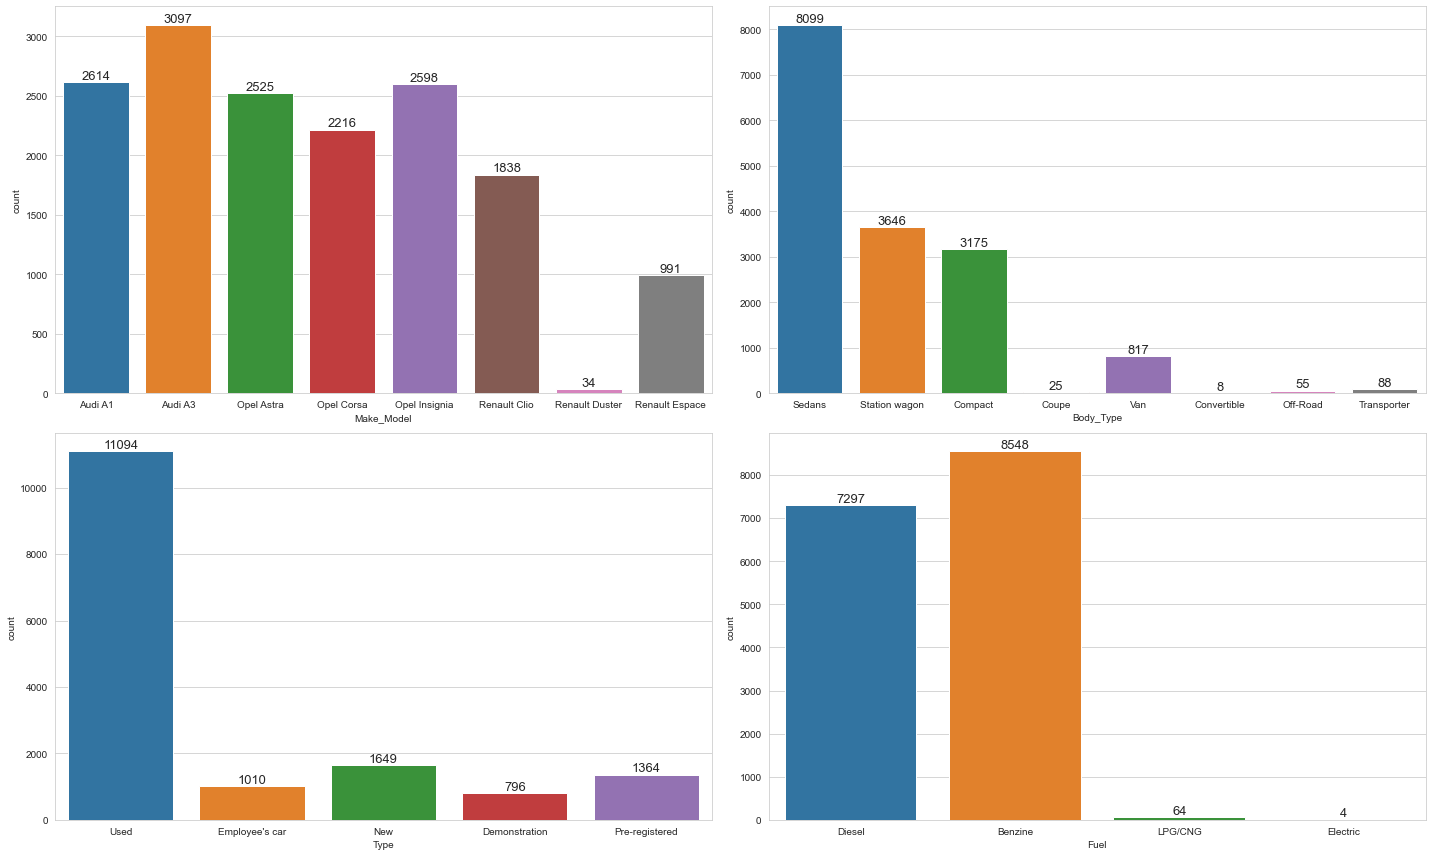

In [8]:
columns = ['Make_Model', 'Body_Type', 'Type', 'Fuel']
index = 0
plt.figure(figsize=(20,12))
for col in columns:    
    index += 1
    plt.subplot(2,2,index)
    a = sns.countplot(data=df, x=col)
    a.bar_label(a.containers[0], fontsize=13)
plt.tight_layout()

***numeric columns***

In [9]:
df.select_dtypes(include=['int64', 'float64']).nunique()

Price                      2952
Age                           4
Km                         6698
Previous_Owners               5
Inspection_New                2
Nr.OfDoors                    4
Nr.OfSeats                    4
Gears                         4
Hp_kW                        77
Displacement_cc              68
Weight_kg                   432
Cons_Comb (l/100 km)         64
CO2_Emission (g/km CO2)     111
dtype: int64

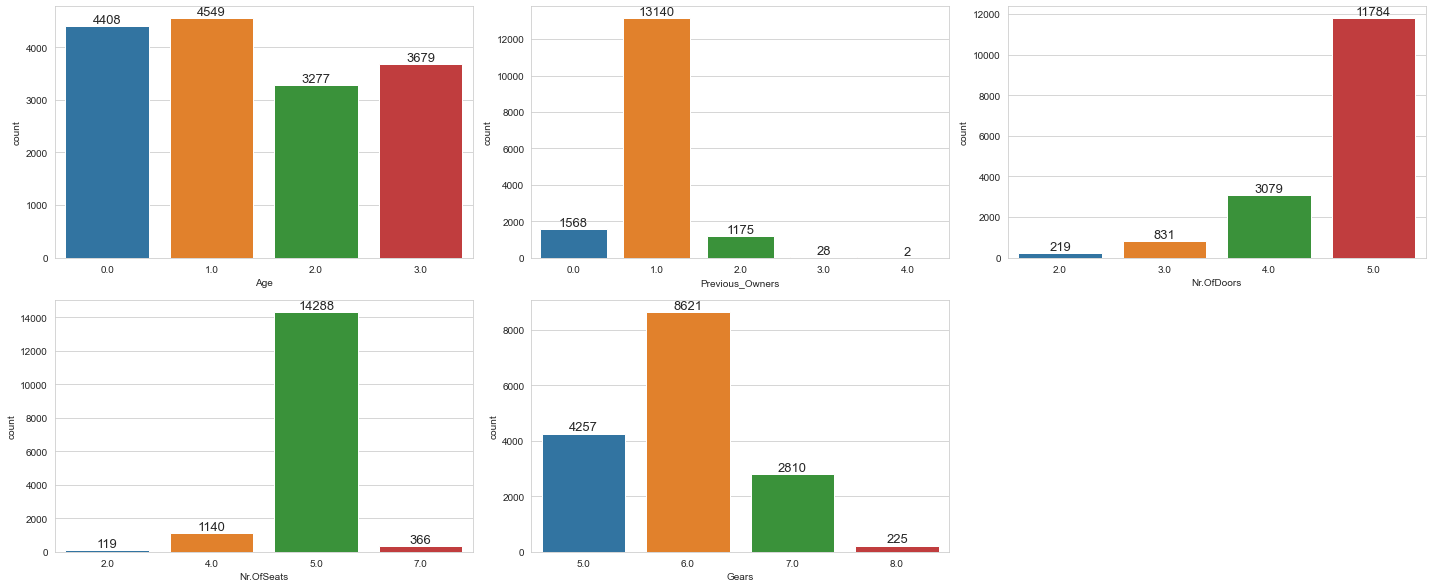

In [10]:
columns = ['Age', 'Previous_Owners', 'Nr.OfDoors', 'Nr.OfSeats', 'Gears']
index = 0
plt.figure(figsize=(20,12))
for col in columns:    
    index += 1
    plt.subplot(3,3,index)
    a = sns.countplot(data=df, x=col)
    a.bar_label(a.containers[0], fontsize=13)
plt.tight_layout()

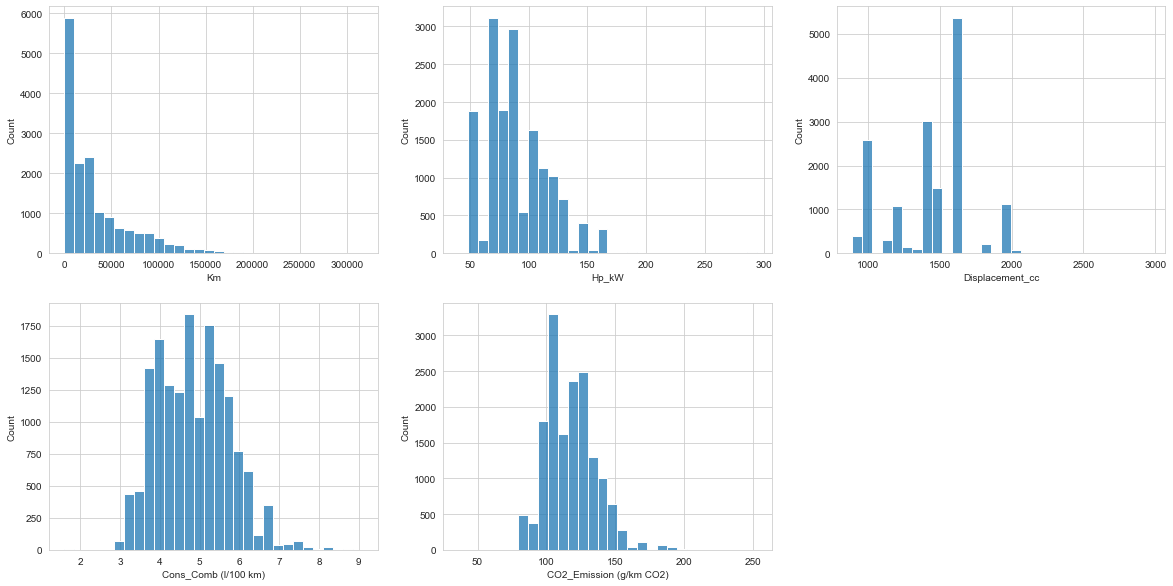

In [11]:
columns = ['Km', 'Hp_kW', 'Displacement_cc', 'Cons_Comb (l/100 km)', 'CO2_Emission (g/km CO2)']
index = 0
plt.figure(figsize=(20,10))
for col in columns:    
    index += 1
    plt.subplot(2,3,index)
    sns.histplot(data=df, x=col, bins=30)

***target column***

1.2363782515627046
AxesSubplot(0.125,0.125;0.775x0.755)


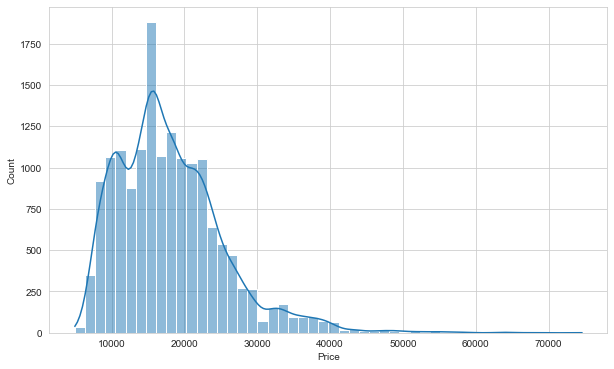

In [12]:
print(skew(df.Price))
print(sns.histplot(df.Price, bins=50, kde=True));

<AxesSubplot:xlabel='Price'>

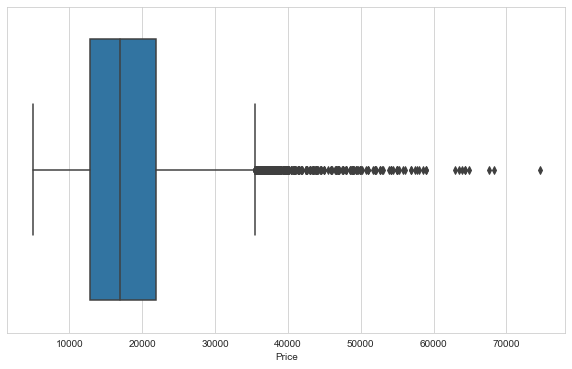

In [13]:
sns.boxplot(data=df, x='Price')

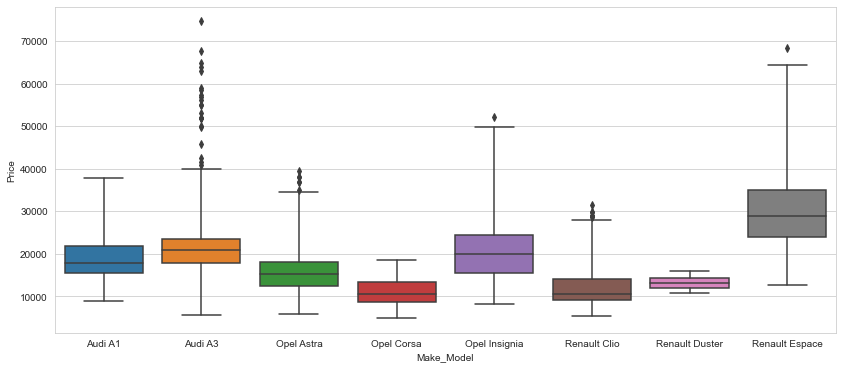

In [14]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Make_Model', y='Price', data=df, whis=3)
plt.show()

***correlations***

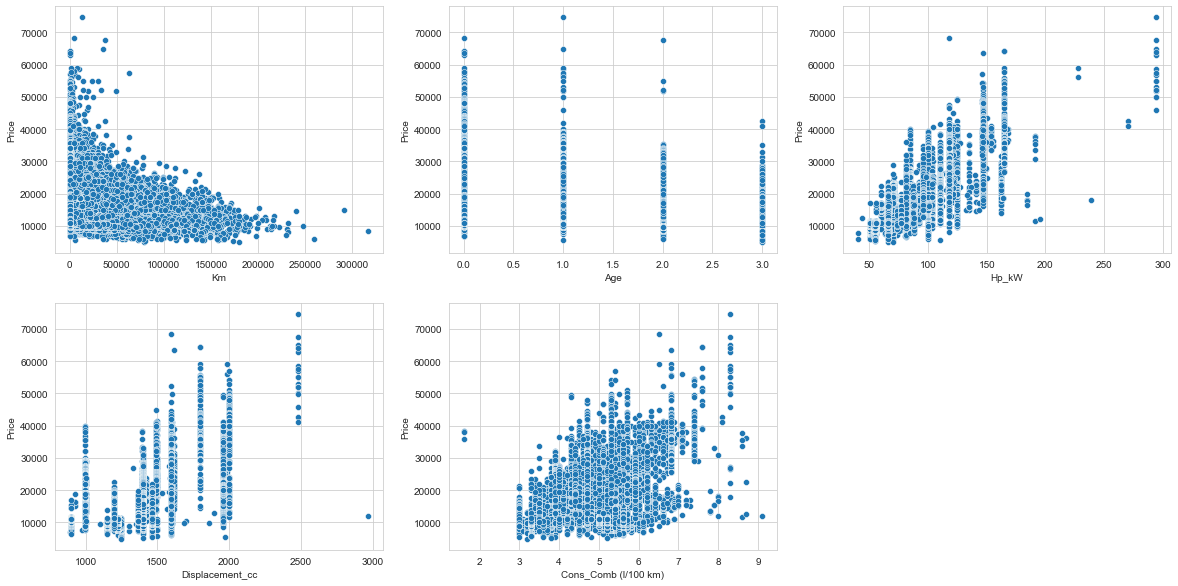

In [15]:
columns = ['Km', 'Age', 'Hp_kW', 'Displacement_cc', 'Cons_Comb (l/100 km)']
index = 0
plt.figure(figsize=(20,10))
for col in columns:    
    index += 1
    plt.subplot(2,3,index)
    sns.scatterplot(data=df, x=col, y='Price')

<AxesSubplot:>

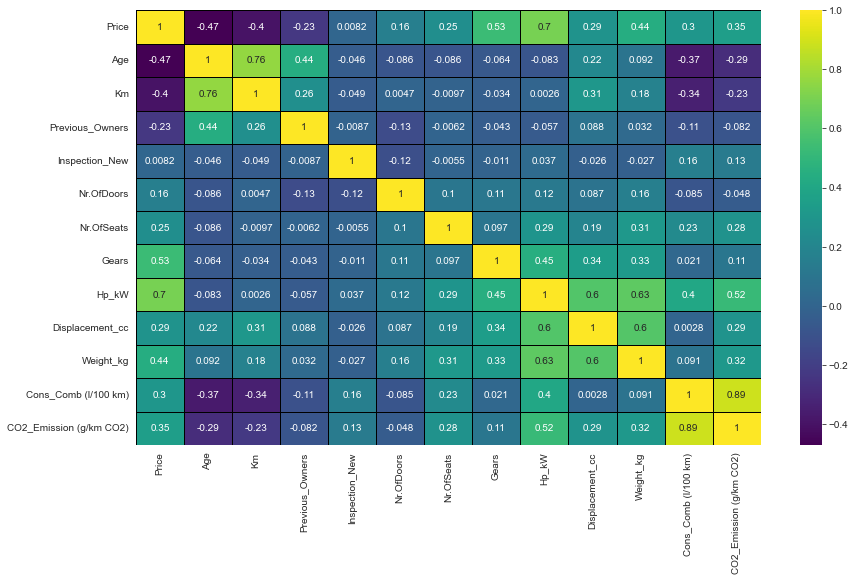

In [16]:
plt.figure(figsize=(14,8))
df_numeric = df.select_dtypes(include ="number")
sns.heatmap(df_numeric.corr(), annot =True, cmap='viridis', linewidth=1, linecolor='black')

<AxesSubplot:>

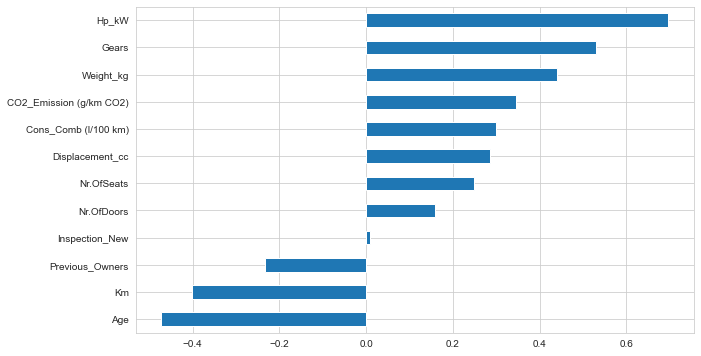

In [17]:
df.corr()['Price'].drop('Price').sort_values().plot.barh()

***multicollinearity control***

In [18]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [19]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

***

***dropping observations from the dataset that worsen predictions***

(explained in the first notebook)

In [20]:
len(df[df.Price>35000])

495

In [21]:
df[df.Price>35000].groupby('Make_Model').size()

Make_Model
Audi A1             2
Audi A3            36
Opel Astra          5
Opel Insignia     216
Renault Espace    236
dtype: int64

In [22]:
df.Make_Model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: Make_Model, dtype: int64

In [23]:
df2 = df[~(df.Price>35000)]
df2

,Make_Model,Body_Type,Price,Vat,Age,Type,Km,Previous_Owners,Inspection_New,Paint_Type,Nr.OfDoors,Nr.OfSeats,Upholstery_Type,Fuel,Drive_Chain,Gearing_Type,Gears,Hp_kW,Displacement_cc,Weight_kg,Cons_Comb (l/100 km),CO2_Emission (g/km CO2),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security
0,Audi A1,Sedans,15770,VAT deductible,3.000,Used,56013.000,2.000,1,Metallic,5.000,5.000,Cloth,Diesel,front,Automatic,7.000,66.000,1422.000,1220.000,3.800,99.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D..."
1,Audi A1,Sedans,14500,Price negotiable,2.000,Used,80000.000,1.000,0,Metallic,3.000,4.000,Cloth,Benzine,front,Automatic,7.000,141.000,1798.000,1255.000,5.600,129.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r..."
2,Audi A1,Sedans,14640,VAT deductible,3.000,Used,83450.000,1.000,0,Metallic,4.000,4.000,Cloth,Diesel,front,Automatic,7.000,85.000,1598.000,1250.000,3.800,99.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D..."
3,Audi A1,Sedans,14500,VAT deductible,3.000,Used,73000.000,1.000,0,Metallic,3.000,4.000,Cloth,Diesel,front,Automatic,6.000,66.000,1422.000,1195.000,3.800,99.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote..."
4,Audi A1,Sedans,16790,VAT deductible,3.000,Used,16200.000,1.000,1,Metallic,5.000,5.000,Cloth,Diesel,front,Automatic,7.000,66.000,1422.000,1250.000,4.100,109.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,Renault Espace,Van,33990,VAT deductible,1.000,Used,10803.000,1.000,0,Metallic,5.000,5.000,Full leather,Diesel,front,Automatic,6.000,118.000,1598.000,1734.000,4.600,120.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Blind spot monitor,Central door lock,Dayti..."
15786,Renault Espace,Van,33975,VAT deductible,0.000,Pre-registered,15.000,1.000,1,Metallic,5.000,5.000,Full leather,Benzine,front,Automatic,7.000,165.000,1798.000,1685.000,7.400,168.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Blind spot monitor,Central door lock,Dayti..."
15787,Renault Espace,Van,33990,VAT deductible,1.000,Pre-registered,1.000,1.000,0,Metallic,5.000,5.000,Full leather,Diesel,front,Automatic,6.000,118.000,1598.000,1734.000,4.700,120.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec..."
15788,Renault Espace,Van,33975,VAT deductible,0.000,Pre-registered,15.000,1.000,1,Metallic,5.000,7.000,Part leather,Diesel,front,Automatic,6.000,146.000,1997.000,1734.000,5.300,139.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor..."


***

## 2. Data Pre-Processing

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
X = df2.drop('Price',axis=1)
y = df2['Price']

In [26]:
cat = X.select_dtypes('object').columns
cat

Index(['Make_Model', 'Body_Type', 'Vat', 'Type', 'Paint_Type',
       'Upholstery_Type', 'Fuel', 'Drive_Chain', 'Gearing_Type',
       'Comfort & Convenience', 'Entertainment & Media', 'Extras',
       'Safety & Security'],
      dtype='object')

In [27]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.sample(5)

,Make_Model,Body_Type,Vat,Age,Type,Km,Previous_Owners,Inspection_New,Paint_Type,Nr.OfDoors,Nr.OfSeats,Upholstery_Type,Fuel,Drive_Chain,Gearing_Type,Gears,Hp_kW,Displacement_cc,Weight_kg,Cons_Comb (l/100 km),CO2_Emission (g/km CO2),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security
9433,3.000,4.000,1.000,2.000,4.000,20164.000,1.000,0,0.000,5.000,5.000,0.000,0.000,1.000,1.000,5.000,66.000,1398.000,1163.000,5.200,120.000,5402.000,47.000,0.000,3194.000
14106,5.000,4.000,1.000,2.000,4.000,19900.000,1.000,0,0.000,5.000,4.000,0.000,1.000,1.000,1.000,5.000,55.000,1461.000,1146.000,3.300,85.000,5707.000,325.000,0.000,1859.000
11083,4.000,4.000,1.000,3.000,4.000,87000.000,1.000,0,0.000,5.000,5.000,0.000,1.000,1.000,1.000,6.000,100.000,1598.000,1543.000,3.600,109.000,1694.000,159.000,427.000,2216.000
11539,4.000,4.000,1.000,1.000,4.000,16650.000,1.000,0,0.000,4.000,5.000,0.000,1.000,1.000,1.000,6.000,100.000,1598.000,1503.000,4.300,114.000,716.000,173.000,482.000,2720.000
4210,1.000,5.000,1.000,2.000,4.000,44764.000,1.000,0,0.000,5.000,5.000,2.000,1.000,1.000,1.000,6.000,85.000,1598.000,1335.000,4.100,108.000,1214.000,89.000,27.000,2980.000


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12334, 25)
Train target shape   :  (12334,)
Test features shape  :  (3084, 25)
Test target shape    :  (3084,)


In [30]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    #pd.options.display.float_format = '{:.3f}'.format
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

***

## 3. Model Implementing

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

# for data visualization
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

***

### Decision Tree

In [32]:
DT_model = DecisionTreeRegressor(random_state=101)
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [33]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.914
mae,20.072,1021.796
mse,18678.735,3171067.616
rmse,136.670,1780.749


In [34]:
# CROSS VALIDATE
# There is an overfitting problem

model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], cv=10)
df_scores = pd.DataFrame(scores)

scoring, minv, maxv, mean = 'scoring', 'min', 'max', 'mean'
cond1 = df_scores[df_scores['test_neg_root_mean_squared_error'] == df_scores['test_neg_root_mean_squared_error'].min()]
cond2 = df_scores[df_scores['test_neg_root_mean_squared_error'] == df_scores['test_neg_root_mean_squared_error'].max()]
print('Cross-Validation Results\n')
print(f'{scoring:<35}|{minv:^15}|{maxv:^15}|{mean:^15}')
print(f'{"":-^35}|{"":-^15}|{"":-^15}|{"":-^15}')
for i in df_scores.columns[2:]:
    print(f'{i:<35}|{abs(cond2[i].values[0]):^15.3f}|{abs(cond1[i].values[0]):^15.3f}|{abs(df_scores[i].mean()):^15.3f}')
print('')

Cross-Validation Results

scoring                            |      min      |      max      |     mean      
-----------------------------------|---------------|---------------|---------------
test_r2                            |     0.929     |     0.886     |     0.912     
test_neg_mean_absolute_error       |    988.124    |   1089.420    |   1050.322    
test_neg_mean_squared_error        |  2736657.689  |  3958240.357  |  3309274.102  
test_neg_root_mean_squared_error   |   1654.285    |   1989.533    |   1817.004    



In [35]:
# GRID SEARCH-1

model = DecisionTreeRegressor(random_state=101)

param_grid = {"splitter":['best', 'random'],
              "max_depth": [None, 3, 4, 5],
              "min_samples_leaf": [1, 3, 5, 7],
              "min_samples_split": [2, 5, 10],
              "max_features": [None, 'sqrt', len(X.columns)/3, 11]}

DT_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10,
                                 verbose=1, n_jobs=-1).fit(X_train, y_train)

print('\n', DT_grid_model.best_params_)
print('\n', DT_grid_model.best_estimator_)
print('\n', DT_grid_model.best_score_)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits

 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'splitter': 'best'}

 DecisionTreeRegressor(min_samples_leaf=3, min_samples_split=10,
                      random_state=101)

 -1683.5242559292772


In [36]:
train_val(DT_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.980,0.926
mae,528.891,1033.475
mse,769084.696,2744308.105
rmse,876.975,1656.595


In [37]:
# GRID SEARCH-2

model = DecisionTreeRegressor(random_state=101)

param_grid = {"splitter":['best', 'random'],
              "max_depth": [7, 9, 11],
              "min_samples_leaf": [3, 5],
              "min_samples_split": [2, 5, 10, 15],
              "max_features": [None, len(X.columns)/3, 15]}

DT_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10,
                                 verbose=1, n_jobs=-1).fit(X_train, y_train)

print('\n', DT_grid_model.best_params_)
print('\n', DT_grid_model.best_estimator_)
print('\n', DT_grid_model.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits

 {'max_depth': 11, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 15, 'splitter': 'best'}

 DecisionTreeRegressor(max_depth=11, min_samples_leaf=3, min_samples_split=15,
                      random_state=101)

 -1671.2072893656962


In [38]:
train_val(DT_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.959,0.925
mae,828.163,1077.372
mse,1544744.915,2778815.140
rmse,1242.878,1666.978


In [39]:
# AVERAGE WRONG PREDICTION RATE

-DT_grid_model.best_score_ / df.Price.mean()

0.09271947059807141

In [40]:
# scores
y_pred = DT_grid_model.predict(X_test)

DT_grid_model_R2 = r2_score(y_test, y_pred)
DT_grid_model_mae = mean_absolute_error(y_test, y_pred)
DT_grid_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
DT_grid_model_cvscore = -(DT_grid_model.best_score_)

***prediction error and residuals***

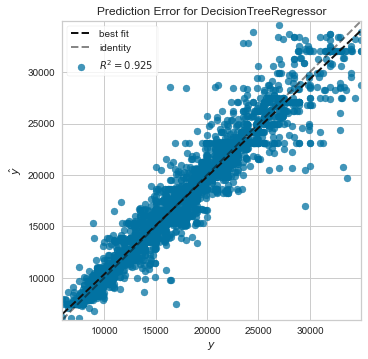

In [41]:
# yellowbrick
model = DecisionTreeRegressor(max_depth=11, min_samples_leaf=3, min_samples_split=15, random_state=101)
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer.show(); 

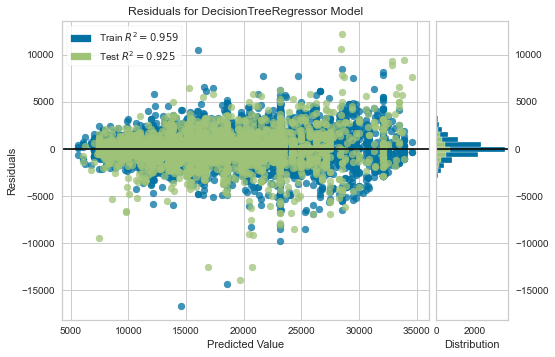

In [42]:
# Residuals Plot (yellowbrick)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer.show(); 

***feature importance***

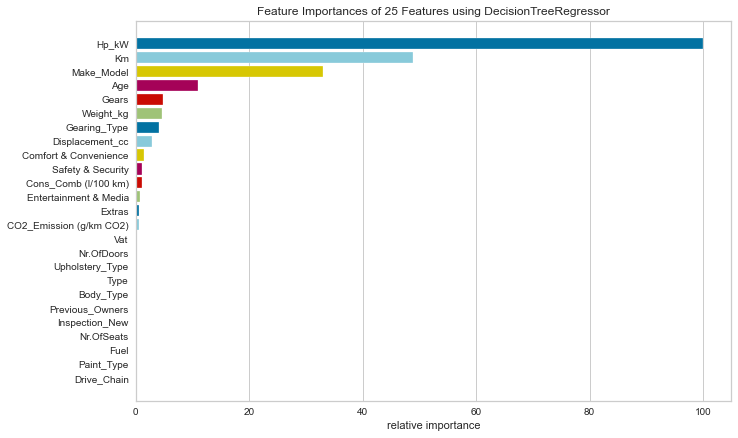

<AxesSubplot:title={'center':'Feature Importances of 25 Features using DecisionTreeRegressor'}, xlabel='relative importance'>

In [43]:
# feature importance
viz = FeatureImportances(model)
visualizer = RadViz(size=(750, 450))
viz.fit(X_train, y_train)
viz.show()

***

### Random Forest

In [44]:
RF_model = RandomForestRegressor(random_state=101)
RF_model.fit(X_train,y_train)

RandomForestRegressor(random_state=101)

In [45]:
train_val(RF_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.993,0.954
mae,316.374,822.983
mse,261666.545,1714917.910
rmse,511.534,1309.549


In [46]:
# CROSS VALIDATE

model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], cv=10)
df_scores = pd.DataFrame(scores)

scoring, minv, maxv, mean = 'scoring', 'min', 'max', 'mean'
cond1 = df_scores[df_scores['test_neg_root_mean_squared_error'] == df_scores['test_neg_root_mean_squared_error'].min()]
cond2 = df_scores[df_scores['test_neg_root_mean_squared_error'] == df_scores['test_neg_root_mean_squared_error'].max()]
print('Cross-Validation Results\n')
print(f'{scoring:<35}|{minv:^15}|{maxv:^15}|{mean:^15}')
print(f'{"":-^35}|{"":-^15}|{"":-^15}|{"":-^15}')
for i in df_scores.columns[2:]:
    print(f'{i:<35}|{abs(cond2[i].values[0]):^15.3f}|{abs(cond1[i].values[0]):^15.3f}|{abs(df_scores[i].mean()):^15.3f}')
print('')

Cross-Validation Results

scoring                            |      min      |      max      |     mean      
-----------------------------------|---------------|---------------|---------------
test_r2                            |     0.957     |     0.947     |     0.951     
test_neg_mean_absolute_error       |    797.535    |    891.400    |    843.329    
test_neg_mean_squared_error        |  1610174.142  |  2119189.854  |  1840868.865  
test_neg_root_mean_squared_error   |   1268.926    |   1455.744    |   1355.253    



In [47]:
# GRID SEARCH-1

model = RandomForestRegressor(random_state=101)

param_grid = {"n_estimators":[64, 100, 128],
              "max_depth": [None, 6, 8],
              "min_samples_leaf": [1, 3, 5],
              "min_samples_split": [2, 10],
              "max_features":[None, 'sqrt', len(X.columns)/3]}

RF_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10,
                             verbose=1, n_jobs=-1).fit(X_train,y_train)

print('\n', RF_grid_model.best_params_)
print('\n', RF_grid_model.best_estimator_)
print('\n', RF_grid_model.best_score_)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits

 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 128}

 RandomForestRegressor(max_features='sqrt', n_estimators=128, random_state=101)

 -1318.4113340609708


In [48]:
train_val(RF_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.993,0.958
mae,312.714,798.493
mse,251893.346,1540716.644
rmse,501.890,1241.256


In [49]:
# GRID SEARCH-2
# (after a few tries)

model = RandomForestRegressor(random_state=101)

param_grid = {"n_estimators":[64, 100],
              "max_depth": [13, 14],
              "min_samples_leaf": [1],
              "min_samples_split": [4, 5],
              "max_features":['auto', 'sqrt', 15]}

RF_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10,
                             verbose=1, n_jobs = -1).fit(X_train,y_train)

print('\n', RF_grid_model.best_params_)
print('\n', RF_grid_model.best_estimator_)
print('\n', RF_grid_model.best_score_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits

 {'max_depth': 14, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}

 RandomForestRegressor(max_depth=14, max_features=15, min_samples_split=4,
                      random_state=101)

 -1326.2830328536352


In [50]:
train_val(RF_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.985,0.958
mae,517.565,842.294
mse,549219.649,1563544.348
rmse,741.094,1250.418


In [51]:
# AVERAGE WRONG PREDICTION RATE

-RF_grid_model.best_score_ / df.Price.mean()

0.07358288911967797

In [52]:
# scores
y_pred = RF_grid_model.predict(X_test)

RF_grid_model_R2 = r2_score(y_test, y_pred)
RF_grid_model_mae = mean_absolute_error(y_test, y_pred)
RF_grid_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
RF_grid_model_cvscore = -(RF_grid_model.best_score_)

***prediction error and residuals***

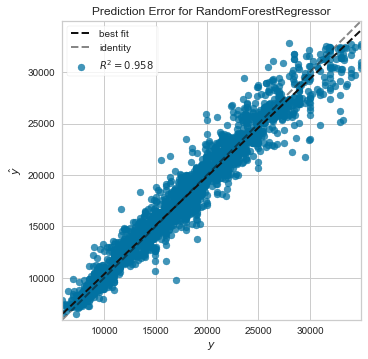

In [53]:
# yellowbrick

model = RandomForestRegressor(max_depth=14, max_features=15, min_samples_split=4, random_state=101)
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer.show(); 

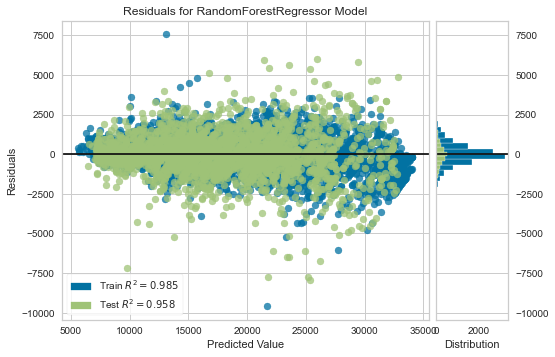

In [54]:
# Residuals Plot (yellowbrick)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer.show(); 

***feature importance***

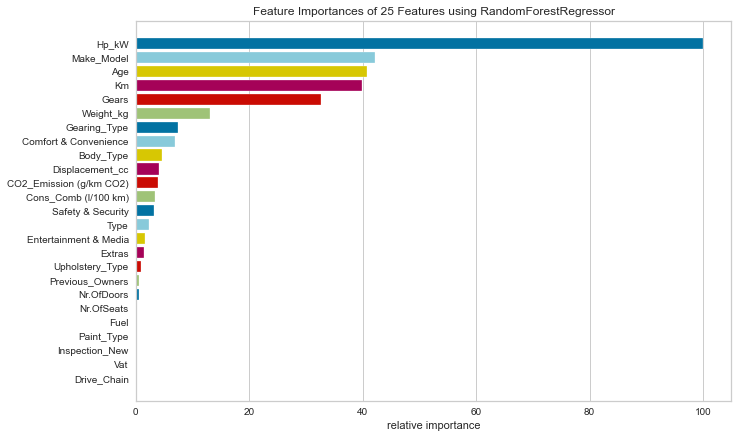

<AxesSubplot:title={'center':'Feature Importances of 25 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [55]:
viz = FeatureImportances(model)
visualizer = RadViz(size=(750, 450))
viz.fit(X_train, y_train)
viz.show()

***

### XGBoost (Extreme Gradient Boosting)

In [56]:
xgb_model = XGBRegressor(random_state=101)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
train_val(xgb_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.984,0.954
mae,568.573,881.902
mse,622172.464,1681364.185
rmse,788.779,1296.674


In [58]:
# CROSS VALIDATE

model = XGBRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], cv=10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                                   0.951
test_neg_mean_absolute_error           -895.475
test_neg_mean_squared_error        -1830342.794
test_neg_root_mean_squared_error      -1351.059
dtype: float64

In [59]:
# GRID SEARCH
# (after a few tries)

model = XGBRegressor(random_state=101)

param_grid = {"n_estimators":[100, 180], "subsample":[0.8, 1],
              "learning_rate": [0.2, 0.3, 0.35], "max_depth":[4, 5], "colsample_bytree":[0.5, 1]}

xgb_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10,
                              verbose=1, n_jobs=-1).fit(X_train, y_train)

print('\n', xgb_grid_model.best_params_)
print('\n', xgb_grid_model.best_estimator_)
print('\n', xgb_grid_model.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits

 {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 180, 'subsample': 0.8}

 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=180, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

 -1327.0431062886223


In [60]:
train_val(xgb_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.979,0.955
mae,644.398,893.193
mse,788422.003,1671740.442
rmse,887.931,1292.958


In [61]:
# AVERAGE WRONG PREDICTION RATE

-xgb_grid_model.best_score_ / df.Price.mean()

0.07362505839871122

In [62]:
# scores
y_pred = xgb_grid_model.predict(X_test)

xgb_grid_model_R2 = r2_score(y_test, y_pred)
xgb_grid_model_mae = mean_absolute_error(y_test, y_pred)
xgb_grid_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_grid_model_cvscore = -(xgb_grid_model.best_score_)

***prediction error and residuals***

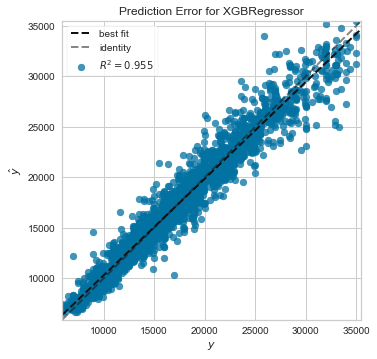

In [63]:
# yellowbrick

model = XGBRegressor(n_estimators=180, subsample=0.8, learning_rate=0.2, max_depth=5, colsample_bytree=1, random_state=101)
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer.show(); 

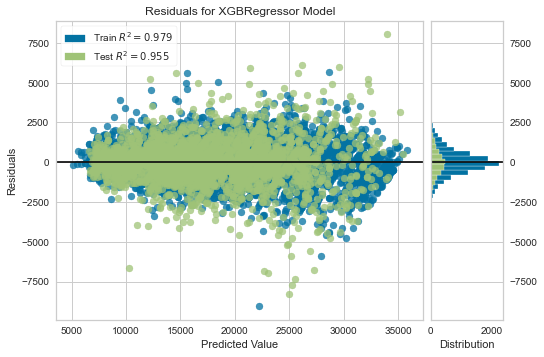

In [64]:
# Residuals Plot (yellowbrick)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer.show();

***feature importance***

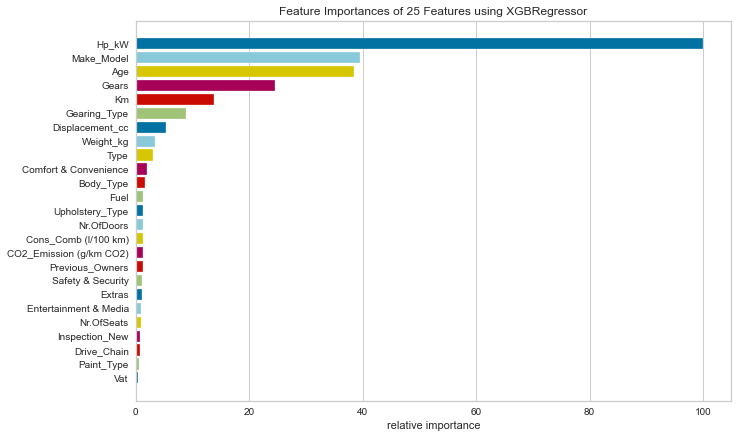

<AxesSubplot:title={'center':'Feature Importances of 25 Features using XGBRegressor'}, xlabel='relative importance'>

In [65]:
viz = FeatureImportances(model)
visualizer = RadViz(size=(750, 450))
viz.fit(X_train, y_train)
viz.show()

***

## 4. Modeling With a New Dataframe (Specific Columns Based On Feature Importances Results)

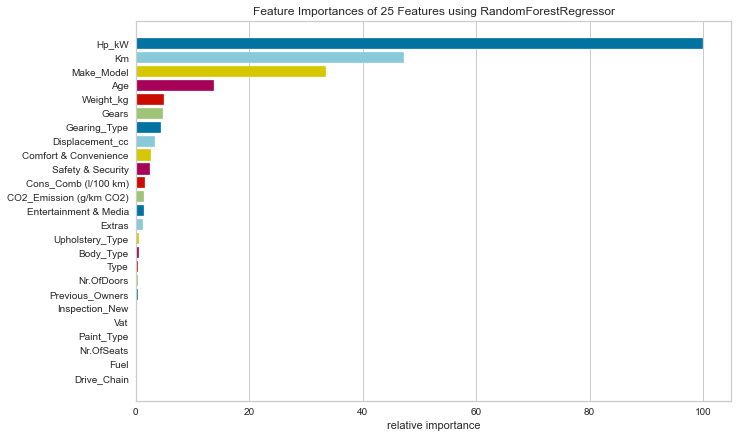

<AxesSubplot:title={'center':'Feature Importances of 25 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [66]:
model = RandomForestRegressor(random_state=101)

viz = FeatureImportances(model)
visualizer = RadViz(size=(750, 450))
viz.fit(X_train, y_train)
viz.show()

In [67]:
df_new = df2[['Make_Model', 'Hp_kW', 'Km', 'Age', 'Gearing_Type', 'Price']]
df_new

,Make_Model,Hp_kW,Km,Age,Gearing_Type,Price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790
...,...,...,...,...,...,...
15785,Renault Espace,118.000,10803.000,1.000,Automatic,33990
15786,Renault Espace,165.000,15.000,0.000,Automatic,33975
15787,Renault Espace,118.000,1.000,1.000,Automatic,33990
15788,Renault Espace,146.000,15.000,0.000,Automatic,33975


In [68]:
X2 = df_new.drop(columns=['Price'])
y2 = df_new.Price

In [69]:
cat = X2.select_dtypes('object').columns
cat

Index(['Make_Model', 'Gearing_Type'], dtype='object')

In [70]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.sample(5)

,Make_Model,Hp_kW,Km,Age,Gearing_Type
14263,5.000,54.000,24000.000,1.000,1.000
6943,2.000,81.000,21896.000,2.000,1.000
14797,5.000,56.000,10.000,0.000,1.000
14211,5.000,54.000,5500.000,1.000,1.000
4761,1.000,85.000,28913.000,1.000,1.000


In [71]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [72]:
RF_model2 = RandomForestRegressor(random_state=101)
RF_model2.fit(X_train2,y_train2)

RandomForestRegressor(random_state=101)

In [73]:
train_val(RF_model2, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.979,0.937
mae,520.408,1009.993
mse,775188.588,2328244.949
rmse,880.448,1525.859


In [74]:
# GRID SEARCH-1

model = RandomForestRegressor(random_state=101)

param_grid = {"n_estimators":[64, 100, 128, 150],
              "max_depth": [None, 6, 8, 10],
              "min_samples_split": [2, 4, 10]}

RF_grid_model2 = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10,
                             verbose=1, n_jobs=-1).fit(X_train2, y_train2)

print('\n', RF_grid_model2.best_params_)
print('\n', RF_grid_model2.best_estimator_)
print('\n', RF_grid_model2.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits

 {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}

 RandomForestRegressor(min_samples_split=10, n_estimators=150, random_state=101)

 -1539.28050639214


In [75]:
train_val(RF_grid_model2, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.966,0.940
mae,741.242,1001.500
mse,1295297.283,2205823.650
rmse,1138.111,1485.202


In [76]:
# GRID SEARCH-2

model = RandomForestRegressor(random_state=101)

param_grid = {"n_estimators":[128, 150, 180],
              "max_depth": [None, 14],
              "min_samples_split": [10, 20]}

RF_grid_model3 = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10,
                             verbose=1, n_jobs=-1).fit(X_train2, y_train2)

print('\n', RF_grid_model3.best_params_)
print('\n', RF_grid_model3.best_estimator_)
print('\n', RF_grid_model3.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits

 {'max_depth': 14, 'min_samples_split': 10, 'n_estimators': 180}

 RandomForestRegressor(max_depth=14, min_samples_split=10, n_estimators=180,
                      random_state=101)

 -1531.1150407179946


In [77]:
train_val(RF_grid_model3, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.963,0.941
mae,789.852,998.433
mse,1406537.517,2180022.584
rmse,1185.975,1476.490


In [78]:
# AVERAGE WRONG PREDICTION RATE

-RF_grid_model3.best_score_ / df_new.Price.mean()

0.08856112994357992

In [79]:
# scores
y_pred = RF_grid_model3.predict(X_test2)

RF_grid_model3_R2 = r2_score(y_test2, y_pred)
RF_grid_model3_mae = mean_absolute_error(y_test2, y_pred)
RF_grid_model3_rmse = np.sqrt(mean_squared_error(y_test2, y_pred))
RF_grid_model3_cvscore = -(RF_grid_model3.best_score_)

***

## 5. Visually Comparing Models Performance

In [80]:
compare = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'Final_Model'],
                    'R2': [DT_grid_model_R2, RF_grid_model_R2, xgb_grid_model_R2, RF_grid_model3_R2],
                    'mae': [DT_grid_model_mae, RF_grid_model_mae, xgb_grid_model_mae, RF_grid_model3_mae],  
                    'rmse': [DT_grid_model_rmse, RF_grid_model_rmse, xgb_grid_model_rmse, RF_grid_model3_rmse],
                    'cv_score': [DT_grid_model_cvscore, RF_grid_model_cvscore, xgb_grid_model_cvscore, RF_grid_model3_cvscore]})

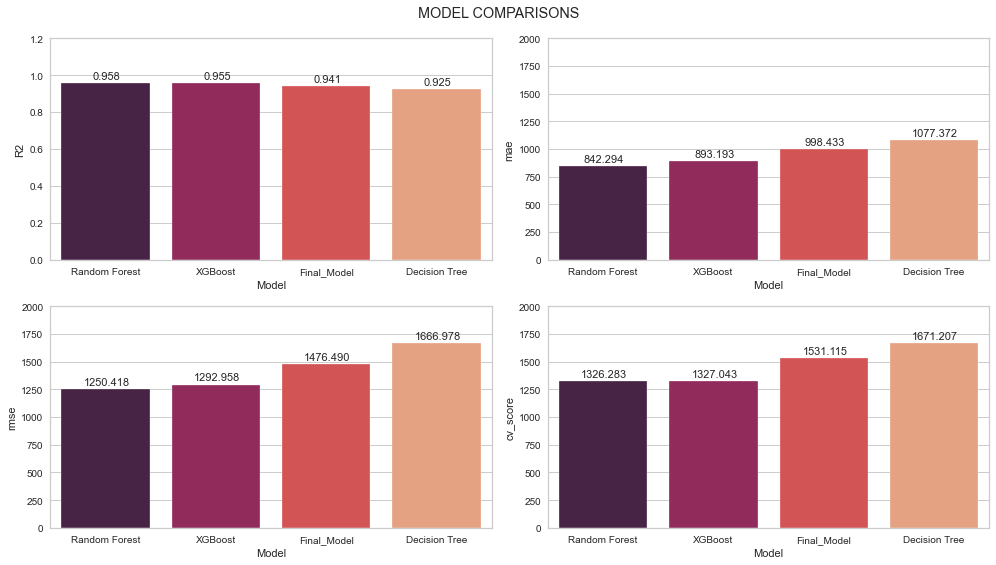

In [81]:
fig, ax = plt.subplots(2,2, figsize=(14,8))

def labels(ax, i, k):
    for p in ax[i][k].patches:
        ax[i][k].annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=11)
                
sns.barplot(x='Model', y='R2', data=compare.sort_values('R2', ascending=False), palette='rocket', ax=ax[0][0]), 
labels(ax,0,0), ax[0][0].set_ylim(0, 1.2)
sns.barplot(x='Model', y='mae', data=compare.sort_values('mae', ascending=True), palette='rocket', ax=ax[0][1]), 
labels(ax,0,1), ax[0][1].set_ylim(0, 2000)
sns.barplot(x='Model', y='rmse', data=compare.sort_values('rmse', ascending=True), palette='rocket', ax=ax[1][0]), 
labels(ax,1,0), ax[1][0].set_ylim(0, 2000)
sns.barplot(x='Model', y='cv_score', data=compare.sort_values('cv_score', ascending=True), palette='rocket', ax=ax[1][1]), 
labels(ax,1,1), ax[1][1].set_ylim(0, 2000)

fig.suptitle('MODEL COMPARISONS')
fig.tight_layout();

***

## FINAL MODEL

In [82]:
final_model = RandomForestRegressor(max_depth=14, min_samples_split=10, n_estimators=180,
                      random_state=101).fit(X2, y2)

In [83]:
# I will save my model using a pickle dump
import pickle
pickle.dump(final_model, open("RandomForest_final", 'wb'))

***feature engineering***

In [84]:
X2.columns

Index(['Make_Model', 'Hp_kW', 'Km', 'Age', 'Gearing_Type'], dtype='object')

In [85]:
X2.describe()

,Make_Model,Hp_kW,Km,Age,Gearing_Type
count,15418.000,15418.000,15418.000,15418.000,15418.000
mean,2.527,86.594,32882.096,1.430,0.580
std,1.922,23.989,37287.551,1.114,0.547
min,0.000,40.000,0.000,0.000,0.000
25%,1.000,66.000,3095.000,0.000,0.000
50%,2.000,85.000,21379.000,1.000,1.000
75%,4.000,100.000,48322.250,2.000,1.000
max,7.000,239.000,317000.000,3.000,2.000


In [86]:
my_dict = {
    "Make_Model": 'Audi A3',
    "Hp_kW": 66,
    "Km": 17000,
    "Age": 2,
    "Gearing_Type": 'Automatic',
}

my_dict = pd.DataFrame([my_dict])
my_dict

,Make_Model,Hp_kW,Km,Age,Gearing_Type
0,Audi A3,66,17000,2,Automatic


In [87]:
cat = my_dict.select_dtypes("object").columns
cat

Index(['Make_Model', 'Gearing_Type'], dtype='object')

In [88]:
enc = OrdinalEncoder()
my_dict[cat] = enc.fit_transform(my_dict[cat])
my_dict.head()

,Make_Model,Hp_kW,Km,Age,Gearing_Type
0,0.000,66,17000,2,0.000


***predict***

In [89]:
# with pickle
final_model = pickle.load(open("RandomForest_final", "rb"))

final_model.predict(my_dict)

array([17832.76679755])

***

In [90]:
df_new

,Make_Model,Hp_kW,Km,Age,Gearing_Type,Price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790
...,...,...,...,...,...,...
15785,Renault Espace,118.000,10803.000,1.000,Automatic,33990
15786,Renault Espace,165.000,15.000,0.000,Automatic,33975
15787,Renault Espace,118.000,1.000,1.000,Automatic,33990
15788,Renault Espace,146.000,15.000,0.000,Automatic,33975


In [91]:
df_new.to_csv('scoutcar_simplified.csv', index=False)